<h3>Trabalho 1 - Análise Estatística de Dados</h3>
Aluno: Rennê Ruan Alves Oliveira


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

In [2]:
imoveis = pd.read_csv(
    "trabalho1.csv", engine="python", sep=";", decimal=",", encoding="latin-1"
)
imoveis.rename(columns={"área": "area", "valor unitário": "valor"}, inplace=True)
imoveis.head()

,area,quartos,vagas,valor
0,91,2,2,8736.263736
1,90,2,2,8222.222222
2,103,3,2,9708.737864
3,95,3,2,11042.105260
4,103,3,2,8349.514563


Média dos valores dos apartamentos


In [3]:
media = imoveis.valor.mean()
print(f"A média dos valores é {media}")

A média dos valores é 8374.217531814815


Calcular mediana, média aparada e desvio-padrão


In [4]:
mediana = imoveis.valor.median()
media_aparada = stats.trim_mean(imoveis.valor, 0.1)
desvio_padrao = imoveis.valor.std()
print(
    f"Mediana: {mediana}\nMédia aparada: {media_aparada}\nDesvio Padrão: {desvio_padrao}"
)

Mediana: 8440.366972
Média aparada: 8315.775498826088
Desvio Padrão: 1098.371762532105


Fazer um gráfico de dispersão e um boxplot


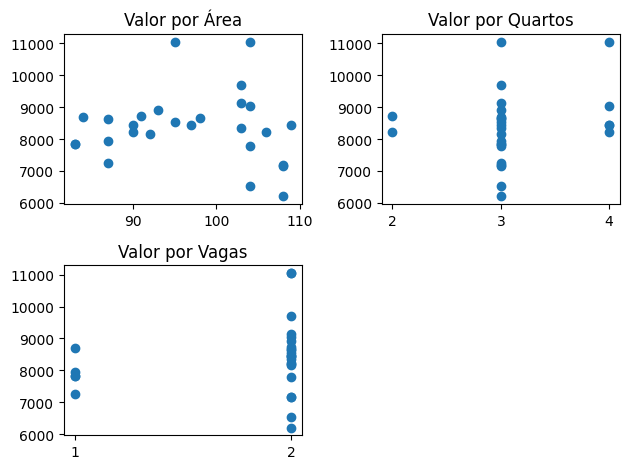

In [5]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(imoveis.area, imoveis.valor)
axs[0, 0].set_title("Valor por Área")

axs[0, 1].scatter(imoveis.quartos, imoveis.valor)
axs[0, 1].set_title("Valor por Quartos")
axs[0, 1].set_xticks(np.arange(min(imoveis.quartos), max(imoveis.quartos) + 1, 1.0))

axs[1, 0].scatter(imoveis.vagas, imoveis.valor)
axs[1, 0].set_title("Valor por Vagas")
axs[1, 0].set_xticks(np.arange(min(imoveis.vagas), max(imoveis.vagas) + 1, 1.0))

fig.delaxes(axs[1, 1])  # Excluir o último gráfico vazio da estrutura 2 por 2

plt.tight_layout()
plt.show()

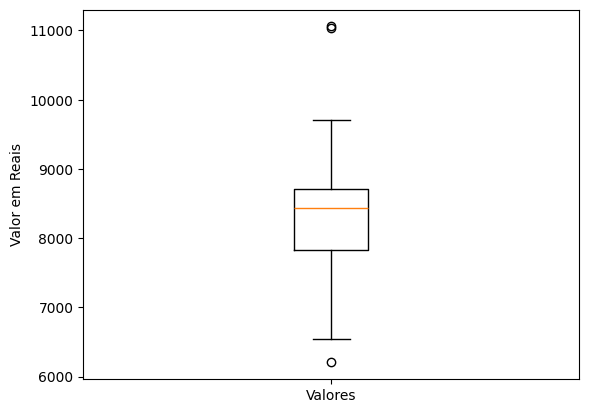

In [6]:
plt.boxplot(imoveis.valor)
plt.xticks([1], ["Valores"])
plt.ylabel("Valor em Reais")
plt.show()

Fazer regressão linear simples em função da área


In [7]:
X = imoveis["area"].values.reshape(-1, 1)
y = imoveis["valor"]
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
a = model.coef_[0]
b = model.intercept_
linear_results = a * X + b  # Equação da reta
print(f"A equação da regressão linear é dada por: y = {a:.7f} * x + {b:.7f}")

A equação da regressão linear é dada por: y = -8.2890174 * x + 9177.3312188


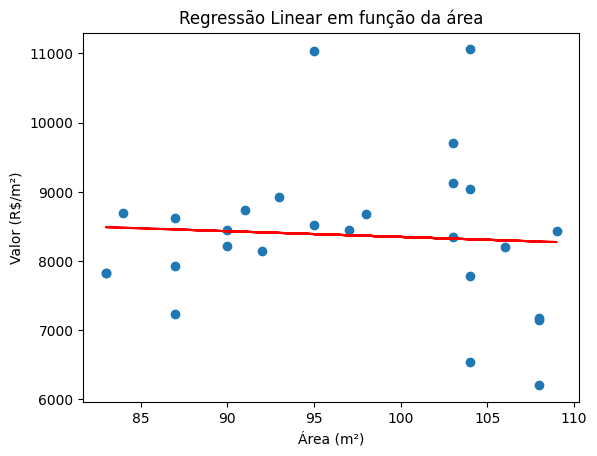

In [9]:
plt.scatter(imoveis.area, imoveis.valor)
plt.xlabel("Área (m²)")
plt.ylabel("Valor (R$/m²)")
plt.plot(X, linear_results, color="red")
plt.title("Regressão Linear em função da área")
plt.show()

Obter valor para um imóvel com base na regressão

In [10]:
area_imoveis = [[90], [85], [100]]  # Valores hipotéticos de X
valores_previstos = model.predict(area_imoveis)
print("Valores previstos:")
for key, area in enumerate(area_imoveis):
    print(f"Área de {area[0]}m², valor de {valores_previstos[key]:.2f} R$/m²")

Valores previstos:
Área de 90m², valor de 8431.32 R$/m²
Área de 85m², valor de 8472.76 R$/m²
Área de 100m², valor de 8348.43 R$/m²


Calcular o coeficiente de determinação e correlação

In [11]:
r_values = imoveis.corr("pearson")
r_values

,area,quartos,vagas,valor
area,1.000000,0.425368,0.680479,-0.065132
quartos,0.425368,1.000000,0.106600,0.215517
vagas,0.680479,0.106600,1.000000,0.207488
valor,-0.065132,0.215517,0.207488,1.000000


In [12]:
print(r_values.valor)

area      -0.065132
quartos    0.215517
vagas      0.207488
valor      1.000000
Name: valor, dtype: float64


O coeficiente de correlação significa o quanto uma variável afeta o valor de outra. Este pode possui valores no intervalo de -1 a 1, tal que o sinal obtido do coeficiente significa uma correção positiva ou negativa.
Positiva: Quando uma variável aumenta/diminui, a outra se altera no mesmo sentido;
Negativa: Quando uma variável aumenta/diminui, a outra tende a realizar o oposto.

Quanto mais próximo de 0 dizemos que as variáveis tem uma correlação fraca, ou seja são idependentes, e quanto mais próximo de |1| dizemos que elas tem uma correlação forte.

Neste caso temos que a área apresenta uma correlação quase nula com o valor unitário, quartos e vagas também possuem pouca influência.

In [13]:
r_square = r_values**2
print(r_square.valor)

print(f"\nR² de área: {(r_square.valor.area * 100):.2f}%")
print(f"R² de quartos: {(r_square.valor.quartos * 100):.2f}%")
print(f"R² de vagas: {(r_square.valor.vagas * 100):.2f}%")

area       0.004242
quartos    0.046448
vagas      0.043051
valor      1.000000
Name: valor, dtype: float64

R² de área: 0.42%
R² de quartos: 4.64%
R² de vagas: 4.31%


O coeficiente de determinação R² pode ser expresso em termos percentuais para explicar o quanto o valor de uma variável depende de outra. Por exemplo, neste caso o resultado do valor unitário do imóvel, tem 0.42% do seu montante explicado pela área, ou seja uma determinação quase nula. A partir de valores tão baixos de determinação temos que procurar outras variáveis e fatores que possam explicar e influenciar o valor dos imóveis.
  

Realizar regressão linear múltipla

In [14]:
X_mult = imoveis[["area", "quartos", "vagas"]]
y_mult = imoveis["valor"]

modelo_mult = LinearRegression()
modelo_mult.fit(X_mult, y_mult)

LinearRegression()

In [18]:
X_new_mult = pd.DataFrame(area_imoveis)
new_columns_values = pd.DataFrame([[3, 2], [3, 1], [3, 2]])

X_new_mult = pd.concat([X_new_mult, new_columns_values], axis=1)
X_new_mult.columns = ["area", "quartos", "vagas"]

X_new_mult

,area,quartos,vagas
0,90,3,2
1,85,3,1
2,100,3,2


In [19]:
previsoes_mult = modelo_mult.predict(X_new_mult)
print("Valores previstos com regressão múltipla:")

print(
    f"Área de {X_new_mult.area[0]}m², {X_new_mult.quartos[0]} quartos e {X_new_mult.vagas[0]} vagas, valor de {previsoes_mult[0]:.2f} R$/m²"
)
print(
    f"Área de {X_new_mult.area[1]}m², {X_new_mult.quartos[1]} quartos e {X_new_mult.vagas[1]} vagas, valor de {previsoes_mult[1]:.2f} R$/m²"
)
print(
    f"Área de {X_new_mult.area[2]}m², {X_new_mult.quartos[2]} quartos e {X_new_mult.vagas[2]} vagas, valor de {previsoes_mult[2]:.2f} R$/m²"
)

Valores previstos com regressão múltipla:
Área de 90m², 3 quartos e 2 vagas, valor de 9173.79 R$/m²
Área de 85m², 3 quartos e 1 vagas, valor de 7888.06 R$/m²
Área de 100m², 3 quartos e 2 vagas, valor de 8321.25 R$/m²


Para exemplificar a diferença vamos pegar o valor do exemplo apartamento com 100m², 3 quartos e 2 vagas

In [21]:
print(f"A média dos imóveis é {media:.2f} R$/m²")
print(f"Utilizando a regressão simples {valores_previstos[2]:.2f} R$/m²")
print(f"Utilizando a regressão múltipla {previsoes_mult[2]:.2f} R$/m²")

A média dos imóveis é 8374.22 R$/m²
Utilizando a regressão simples 8348.43 R$/m²
Utilizando a regressão múltipla 8321.25 R$/m²


Os 3 valores são relativamente próximos, porém o obtido com a regressão múltipla sofre razoável diferença quando são alterados os números de quartos ou vagas, o exemplo utilizado possui a maior área entre os exemplos mas não necessariamente resultou no maior valor com a regressão múltipla.

A regressão simples pela área trás uma baixíssima correlação entre a área e o valor do imóvel, ou seja uma correlação fraca, o que talvez não proveria valores condizentes com o digno ao imóvel.

A média é uma medida robusta mas que não leva em conta os valores de cada exemplo, pro exemplo citado apresenta o maior valor dentre os 3 calculados. Podendo resultar em um preço acima do mercado

O valor de regressão linear múltipla realiza um descréscimo ao preço do imóvel de acordo com as variáveis de quartos e vagas, porém esta diminuição não é exorbitante, o que levaria a um deslocamento do preço ao mercado, mas a quantia de vagas realmente deveria valorizar imóveis. A redução no valor pela área se dá por utilizarmos o preço por m², uma vez que o preço total de um apartamento de 100m² seria maior que o de 90m² tendo as mesmas condições. A regressão linear múltipla apresenta maior adaptabilidade ao preço de mercado de acordo com o que foi proposto, evitando por exemplo um preço muito acima que seja difícil de vender.
